# K-Nearest Neighbour Regression

### Danny Rachmadian Yusuf Satryatama

## Import Libaries and Load the Dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

In [11]:
# Load the dataset
df = pd.read_csv('students_social_media_preprocessed.csv')

## Data Exploration

In [3]:
# Display the first few rows of the dataframe
print("Dataset Head:")
print(df.head())

# Display dataset info
print("\nDataset Info:")
df.info()

Dataset Head:
        Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
0  0.959149              -1.353023               0.030589   
1 -0.481490              -0.574265               0.466244   
2 -0.481490               1.061127              -2.147688   
3 -1.201810               1.294754              -1.102115   
4 -1.201810              -1.586651               1.773210   

   Mental_Health_Score  Conflicts_Over_Social_Media  Gender_Encoded  \
0             0.700311                    -0.900107               1   
1            -1.107356                     1.197663               0   
2            -0.203523                     1.197663               0   
3            -2.011190                     1.197663               0   
4             1.604144                    -0.900107               0   

   Affects_Academic_Performance_Encoded  Academic_Level_Graduate  \
0                                     0                        1   
1                                     1                 

In [4]:
# Statistical summary
print("Statistical Summary")
print("="*50)
df.describe()

Statistical Summary


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Gender_Encoded,Affects_Academic_Performance_Encoded,Academic_Level_Graduate,Academic_Level_High School,Academic_Level_Undergraduate,...,Country_Turkey,Country_UAE,Country_UK,Country_USA,Addicted_Score,Usage_Category_Encoded,Adequate_Sleep,Mental_Health_Risk_Encoded,SM_Impact_Score,Lifestyle_Balance
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,...,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,-0.006386,-0.014553,0.003522,0.001603,-0.008927,0.499291,0.642553,0.460993,0.038298,0.500709,...,0.038298,0.011348,0.031206,0.056738,6.436879,1.960284,0.472340,1.363121,0.349809,0.080093
std,1.007884,0.979206,0.981835,0.998786,1.004798,0.500354,0.479588,0.498830,0.192051,0.500354,...,0.192051,0.105994,0.173997,0.231505,1.587165,0.670913,0.499589,0.562867,0.290296,0.366869
min,-1.922129,-2.676912,-2.670474,-2.011190,-2.997878,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,-1.201810,-0.652141,-0.753591,-1.107356,-0.900107,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,1.000000,0.000000,-0.216976
50%,0.238829,-0.107010,0.030589,-0.203523,0.148778,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,0.000000,1.000000,0.415385,0.115385
75%,0.959149,0.671748,0.727637,0.700311,1.197663,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,1.000000,2.000000,0.584615,0.353050
max,2.399788,2.774395,2.383127,2.507977,2.246549,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,9.000000,3.000000,1.000000,3.000000,1.000000,0.969231


In [5]:
# Check Null Values
print("\nNull Values:")
df.isna().sum().sort_values(ascending=False)


Null Values:


,0
Age,0
Avg_Daily_Usage_Hours,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0
Conflicts_Over_Social_Media,0
...,...
Usage_Category_Encoded,0
Adequate_Sleep,0
Mental_Health_Risk_Encoded,0
SM_Impact_Score,0


In [6]:
print("Dataset Information")
print("="*50)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nColumn Information:")
df.info()

print("\nColumn Names:")
print(df.columns.tolist())

Dataset Information
Number of rows: 705
Number of columns: 64

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 64 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   705 non-null    float64
 1   Avg_Daily_Usage_Hours                 705 non-null    float64
 2   Sleep_Hours_Per_Night                 705 non-null    float64
 3   Mental_Health_Score                   705 non-null    float64
 4   Conflicts_Over_Social_Media           705 non-null    float64
 5   Gender_Encoded                        705 non-null    int64  
 6   Affects_Academic_Performance_Encoded  705 non-null    int64  
 7   Academic_Level_Graduate               705 non-null    int64  
 8   Academic_Level_High School            705 non-null    int64  
 9   Academic_Level_Undergraduate          705 non-null    int64  
 10  Rel

## Defining Features and Target


Target variable 'Addicted_Score' statistics:
count    705.000000
mean       6.436879
std        1.587165
min        2.000000
25%        5.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Addicted_Score, dtype: float64


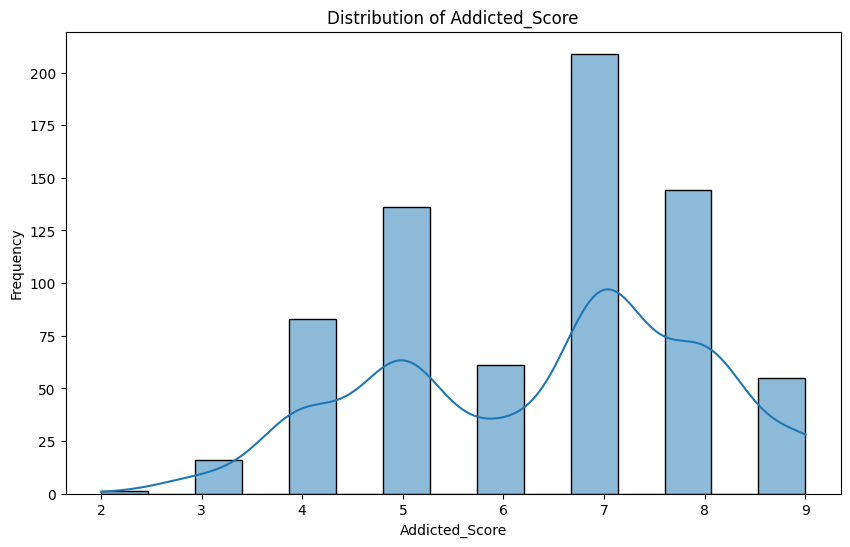


Top 10 features correlated with Addicted_Score:
Addicted_Score                          1.000000
Mental_Health_Score                     0.945051
Conflicts_Over_Social_Media             0.933586
SM_Impact_Score                         0.909646
Mental_Health_Risk_Encoded              0.883791
Affects_Academic_Performance_Encoded    0.866049
Lifestyle_Balance                       0.843751
Avg_Daily_Usage_Hours                   0.832000
Sleep_Hours_Per_Night                   0.764858
Usage_Category_Encoded                  0.755325
Name: Addicted_Score, dtype: float64


In [18]:
# Target variable analysis
target = 'Addicted_Score'
print(f"\nTarget variable '{target}' statistics:")
print(df[target].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df[target], kde=True, bins=15)
plt.title(f'Distribution of {target}')
plt.xlabel(target)
plt.ylabel('Frequency')
plt.show()

# Correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numeric_columns].corr()

# Get top 10 features most correlated with target
top_corr = df[numeric_columns].corr()['Addicted_Score'].abs().sort_values(ascending=False)[:10]
print("\nTop 10 features correlated with Addicted_Score:")
print(top_corr[:11])

In [24]:
# Define X (features) by dropping all columns except target
X = df.drop(['Addicted_Score'], axis=1)

# Define y (target)
y = df['Addicted_Score']

random_state = 42

print("Feature columns:")
print(X.columns.tolist())
print(f"\nNumber of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

Feature columns:
['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Gender_Encoded', 'Affects_Academic_Performance_Encoded', 'Academic_Level_Graduate', 'Academic_Level_High School', 'Academic_Level_Undergraduate', 'Relationship_Status_Complicated', 'Relationship_Status_In Relationship', 'Relationship_Status_Single', 'Platform_Facebook', 'Platform_Instagram', 'Platform_KakaoTalk', 'Platform_LINE', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_TikTok', 'Platform_Twitter', 'Platform_VKontakte', 'Platform_WeChat', 'Platform_WhatsApp', 'Platform_YouTube', 'Country_Frequency', 'Country_Australia', 'Country_Bangladesh', 'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_Denmark', 'Country_Finland', 'Country_France', 'Country_Germany', 'Country_India', 'Country_Ireland', 'Country_Italy', 'Country_Japan', 'Country_Malaysia', 'Country_Maldives', 'Country_Mexico', 'Country_Nepal', 'Country_Netherlands', 'Country_New Ze

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (564, 63)
Test set shape: (141, 63)


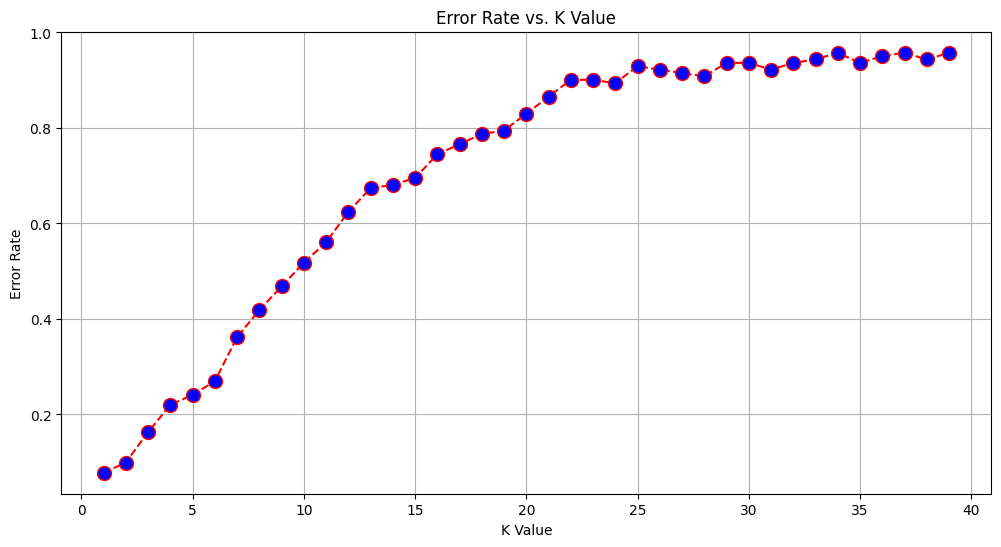

In [27]:
error_rate = []
k_range = range(1, 40) # Test k values from 1 to 39

for i in k_range:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # The error rate is the mean of where predictions are not equal to the actual values
    error_rate.append(np.mean(pred_i != y_test))

# Create a plot to visualize the Error Rate vs. K Value
plt.figure(figsize=(12, 6))
plt.plot(k_range, error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

## Train Models and Make Predictions with Model Performance

In [56]:
# Get the indices that would sort the error_rate list in ascending order
sorted_indices = np.argsort(error_rate)

# Get the top 10 indices
top_10_indices = sorted_indices[:10]

# Use these top 10 indices to get the top 10 k values in order of increasing error
top_10_optimal_k_values = [k_range[i] for i in top_10_indices]

print("Top 10 optimal k values ordered by error rate (lowest to highest):")
for i, index in enumerate(top_10_indices):
    k = k_range[index]
    error = error_rate[index]
    print(f"{i + 1}. k = {k} (Error: {error:.4f})")

# The actual optimal k value (lowest error) is still the first in the sorted list
optimal_k_value = k_range[sorted_indices[0]]
print(f"\nBased on the lowest error, the best optimal k value is: {optimal_k_value}")

# Initialize the final KNN model with the single best optimal 'k'
knn = KNeighborsRegressor(n_neighbors=optimal_k_value)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

Top 10 optimal k values ordered by error rate (lowest to highest):
1. k = 1 (Error: 0.0780)
2. k = 2 (Error: 0.0993)
3. k = 3 (Error: 0.1631)
4. k = 4 (Error: 0.2199)
5. k = 5 (Error: 0.2411)
6. k = 6 (Error: 0.2695)
7. k = 7 (Error: 0.3617)
8. k = 8 (Error: 0.4184)
9. k = 9 (Error: 0.4681)
10. k = 10 (Error: 0.5177)

Based on the lowest error, the best optimal k value is: 1


## Model Performance


Model Performance using the optimal k value
Mean Absolute Error (MAE): 0.0780
Mean Squared Error (MSE): 0.0780
Root Mean Squared Error (RMSE): 0.2793
R-squared (R2) Score: 0.9720

Prediction Visualization


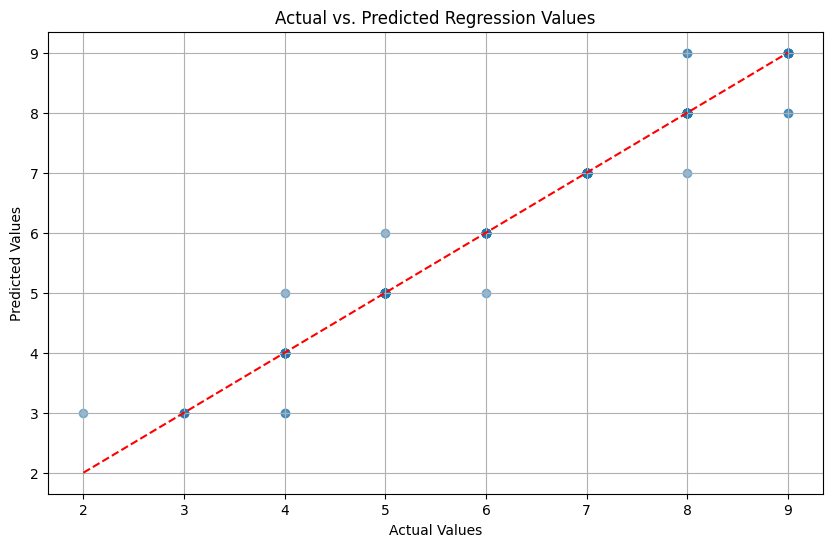

In [64]:
# Calculate Model Performance Metrics
print("\nModel Performance using the optimal k value")
print("=" * 50)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")

print("\nPrediction Visualization")
print("=" * 50)
plt.figure(figsize=(10, 6))

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Regression Values")
plt.grid(True)
plt.show()

# Scenarios

In [65]:
print("SOON")

SOON
